In [2]:
import skimage
import skimage.filters

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [3]:
dataset_dir = "dataset/"

In [4]:
img = np.array(Image.open(dataset_dir + "images/01_dr.JPG").convert("L"))

(2336, 3504)


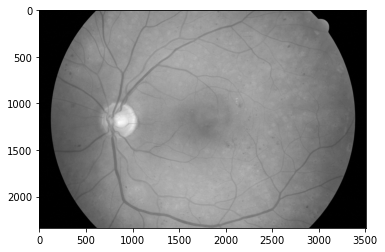

In [6]:
print(img.shape)

plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [7]:
frangi_img = skimage.filters.frangi(img)

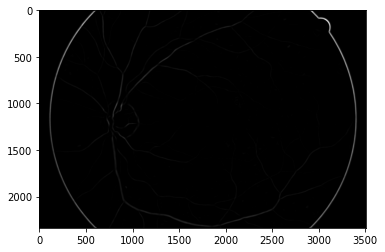

In [8]:
plt.imshow(frangi_img, cmap=plt.cm.gray)
plt.show()

In [9]:
hessian_img = skimage.filters.hessian(img)

/tmp/ipykernel_8671/1277683422.py:1: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  hessian_img = skimage.filters.hessian(img)


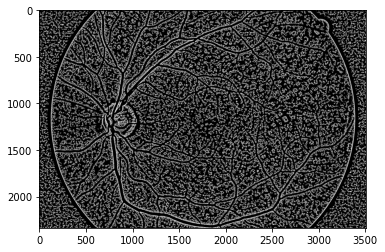

In [10]:
plt.imshow(hessian_img, cmap=plt.cm.gray)
plt.show()